Question 1

(100, 1)


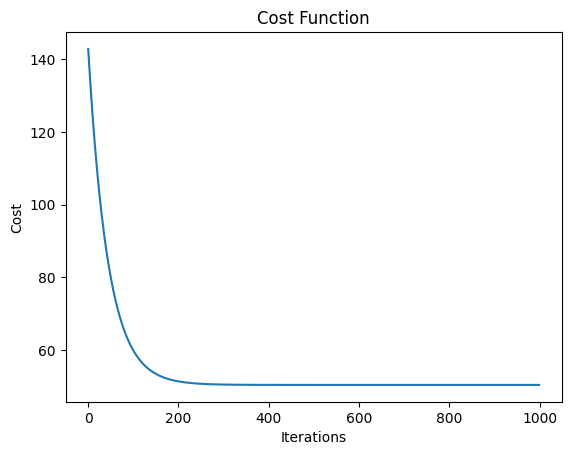

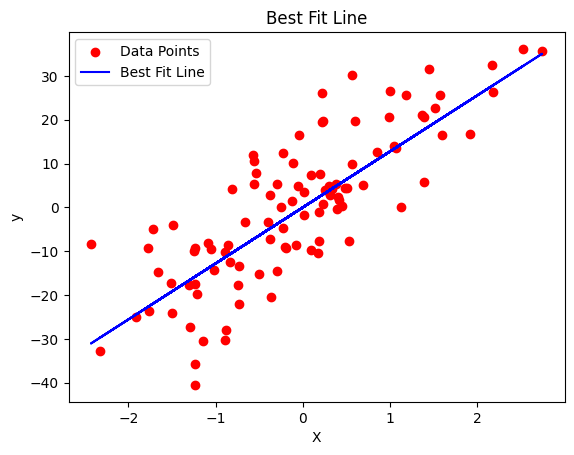

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameters: theta
    print(X.shape)
    theta = np.zeros(1)
    
    m = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        # Calculate predicted values: h_theta(x)
        predictions = np.dot(X, theta)     
        
        # Calculate the error: y_pred - y
        error = predictions - y
        
        # Calculate the gradients: 1/m * X.T * error
        gradients = 1/m * np.dot(X.T, error)
        
        # Update parameters: theta = theta - learning_rate * gradients
        theta -= learning_rate * gradients
        
        # Calculate the cost function: MSE
        cost = 1/(2*m) * np.sum(error**2)
        cost_history.append(cost)
    
    return theta, cost_history

# Generate random regression data using scikit-learn
X, y = make_regression(n_samples=100, n_features=1, noise=10)

# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Call the gradient_descent function and store the results
theta, cost_history = gradient_descent(X, y, learning_rate, num_iterations)

# Plot the cost function over iterations
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

# Plot the best fit line
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, np.dot(X, theta), color='blue', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()


Question 2 

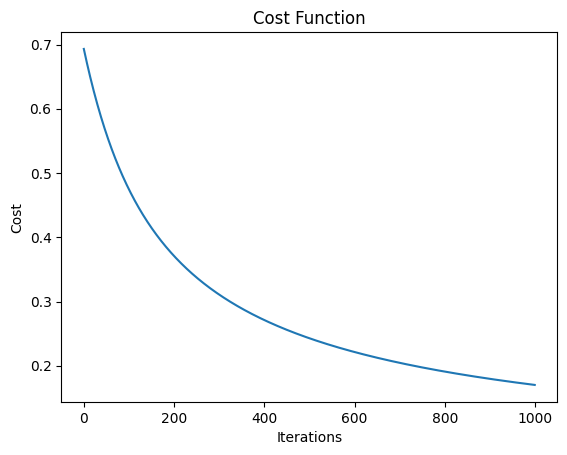

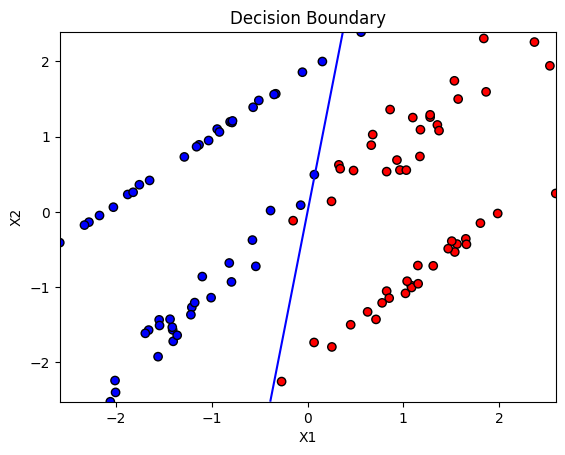

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate, num_iterations):
    # Initialize parameters: theta
    theta = np.zeros(X.shape[1])
    
    m = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        # Calculate predicted probabilities: h_theta(x)
        predictions = sigmoid(np.dot(X, theta))
        # predictions = sigmoid(z)
        
        # Calculate the error: y_pred - y
        error = predictions - y
        
        # Calculate the gradients: 1/m * X.T * error
        gradients = 1/m * np.dot(X.T, error)
        
        # Update parameters: theta = theta - learning_rate * gradients
        theta -= learning_rate * gradients
        
        # Calculate the cost function: log loss
        cost = -1/m * (np.dot(y, np.log(predictions)) + np.dot((1-y), np.log(1-predictions)))
        cost_history.append(cost)
    
    return theta, cost_history

# Generate random classification data using scikit-learn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Call the logistic_regression function and store the results
theta, cost_history = logistic_regression(X, y, learning_rate, num_iterations)

# Plot the cost function over iterations
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(grid, theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()
